We want to know the underlying influencers and how they can be adjusted in order to increase or derease the final measured quantity, whether ir be sales, customer base, costs, or risk. Such metrics would include P-values associated withe the various features, comparing models with features removed and investigating the potential multicollinearity in the model. Multicollinearity also touches upon checking model assumptions. One underlying intution motivating the regression model is that of a set of levers which, if appropriately adjusted, account for the trget variable. The theory then goes tht the errors should be simply the cause of noise in our measurements, or smaller unaccounted factors. These errors are then assumed to be normally distributed.

### Making the Linear Regression Model

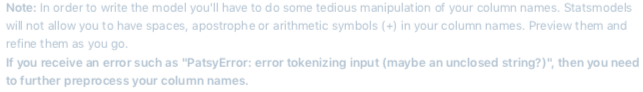

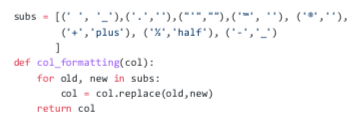

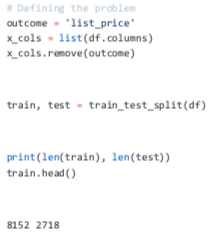

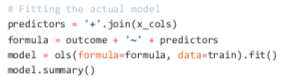

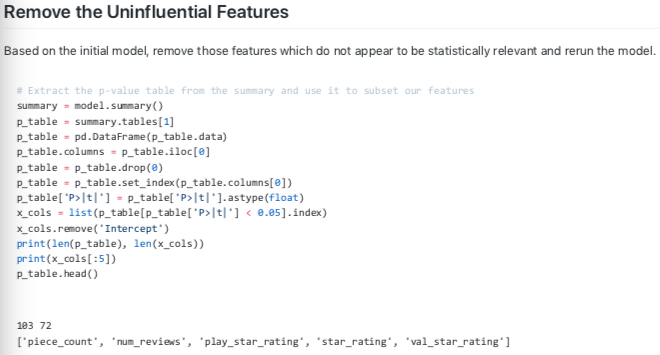

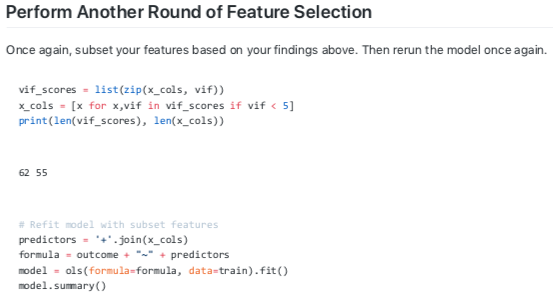

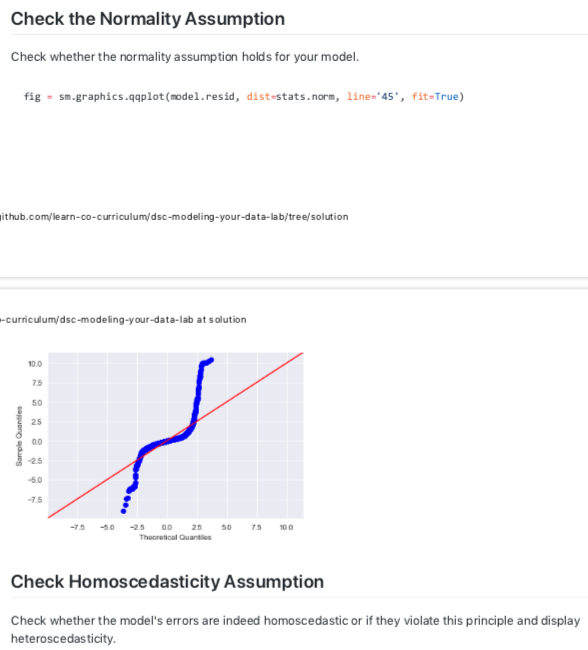

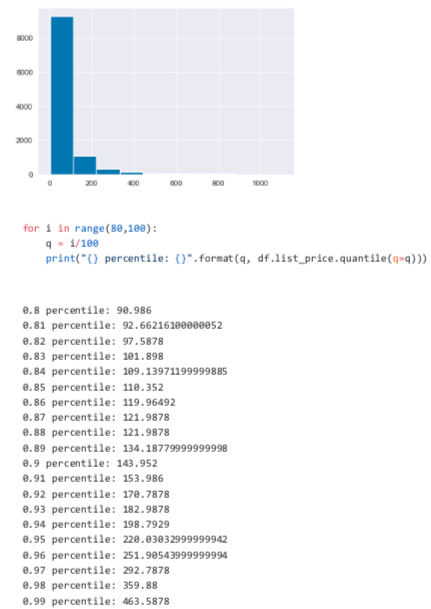

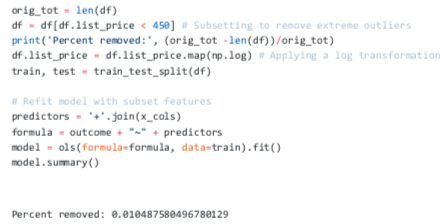

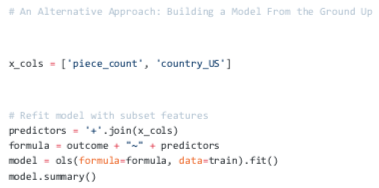

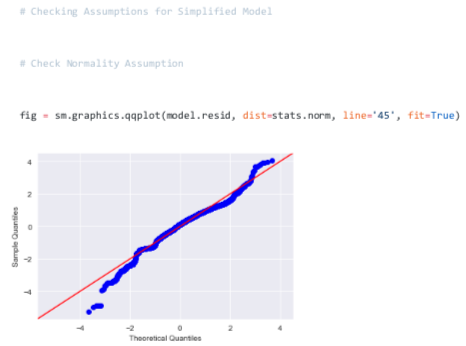

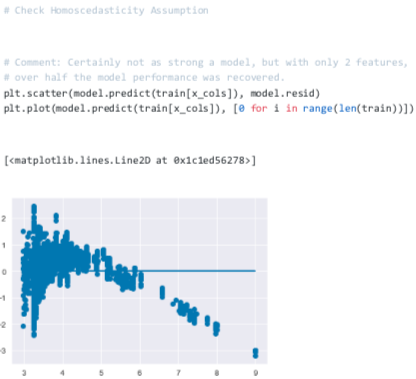

### Categorical Data

In [ ]:
#Categorical data is used as predictors. Decide between 
# feature names, and columns names. Features vs. Target(s).
boston_features = pd.DataFrame(boston.data, columns=boston.feature_names)
#Using the target key, convert the target to a separate dataframe and set 'medv'
#as the column name
boston_target = pd.DataFrame(boston.target, columns['medv'])
#The target is described as:
#Next, let's merge the target and the predcitros in one dataframe
boston_df = pd.concat([boston_target, boston_features], axis=1)

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(boston_features)[0:4], axes):
    boston_df.plot(kind='scatter', x=xcol, y='medv', ax=ax, alpha=0.4, color='b')
    
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(boston_features)[4:8], axes):
        boston_df.plot(kind='scatter', x=xcol, y='medv', ax=ax, alpha=0.4, color='b')
        
#To categorical: Binning
#If you created your scatterplots correctly, you'll notice that there is no clear categorical data.
#You may see that RAD and TAX have more of vertical looking structure like
#one seen in the lesson, and that there is less of a "cloud" looking structure. But
#difficult to justify a linear pattern between predictor and target here. So
#It may make more sense to restructure data into bins so that they are treated as categorical variables.

boston_df['RAD'].describe()
bins = [0,3,4,5,24]

bins_rad= pd.cut(boston_df['RAD'], bins)
bins_rad = bins_rad.cas.as_ordered()

#Perform Label Encoding
boston_df['RAD'] = boston_df['RAD'].cat.codes

#Create Dummy Variables and make sure their column names contain 'TAX' and
#'RAD' remembering to drop the first. Add the new dummy variables to boston_df

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
boston_df = boston_df.drop(['RAD', 'TAX'], axis=1)

boston_df = pd.concat([boston_df, rad_dummy, tax_dummy], axis=1)

#Once a regression model is created, we need to decide how "accurate" the regression line is.
#Here is the equation for R-Squared or the Coefficient of Determination.

#Recall that the objective of R^2 is to learn how much of the error is a result of the variation 
#in the data features as opposed to being a result of the regression line
#being a poor fit.

#Programming R-Squared

#Let's calculate R-Squared in Python. The first step would be to calculate
#the suqared error. Remember that the squared error is the residual sum of squares
#of the difference between a givn line and the actual data points.

#Create a function sq_err() that takes in y points for 2 arrays, calculates the difference
#between corresponding elements of these arrays, squares the differences, and sums all the squared
#differences. The function should return the RSS value you saw earlier.

import numpy as np
def sq_error(y_real, y_predicted):
    squared_error = np.sum((y_real - y_predicted)**2)
    return squared_error

y= np.array([1, 3, 5, 7])
y_pred= np.array([4.14666, 2.3866, 3.56, 5.906])

sq_err(y, y_pred)

#Squared error, is only a part of the coefficient of determination.
#Let's now build a function that uses the sq_err() function above
#to calculate the value of r-squared by first calculating SSE and then use
#this same function to calculate SST (use the mean of y instead of the regression line)
#and then plug these values into the r-squared formula.

#Calculate the man of the y_real
#Calculate SSR using sq_err() or SSE
#Calculate SST
#Calculate R-squared from above values using the given formula

### Feature Scaling and Normalization

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessng import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklean.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import *
import matplotlib.pyplot as plt
%matplotlib inline

#Import the dataset
df = pd.read_csv('')
df.head()

#Subset the dataframe to only keep the valuable columns.

df=df[['domgross', 'budget', 'imdbRating', 'Metascore'
      , 'imdbVotes']]

#Split the data
#First, assign the predictors to x and the outcome variable, 'domgross' to y
#Split the data the trianing and tests sets. Set the seed to 42 and the test_size to 0.25
#domgross is the outcome variable
x = df[['budget', 'imdbRating', 'Metascore', 'imdbVotes']]
y = df['domgross']

x_train, x_test, y-train, y_test = train_test_split(x, y,test_size=0.25, random_state=42)

#Use the MinMaxScaler to scale the training set. Remember you can fit and transform in a single
# method using .fit_transform().

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

#transform the test data (x_test) using the same scaler:
x_test_scaled = scaler.transform(x_test)

#fir a regression model to the training data

lin_reg = linear_regression()
linreg.fit(x_train_scaled, y_train)

LinearRegression(copy_x=True, fit_intercept=True, n_jobs=None, normalize=False)

#Use the model to make predictions on both the training and test sets.

#Training set predictions
lm_train_predictions = linreg.predict(x_train_scaled)
#Test set predictions
lm_test_predictions = linreg.predict(x_test_scaled)

#Plot predictions for the training set against the actual data
#Run this cel - vertical distance between the points and the line denote errors
plt.figure(figsize=(8,5))
plt.scatter(y_train, lm_train_predictions, label="model")
plt.plot(y_train, y_train, label="Actual data")
plt.title('Model vs data for training set')
plt.legend();

#Plot predictions for the test set against the actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test, lm_test_predictions, label="model")
plt.plot(y_test, y_test, label="Actual data")
plt.title('Model vs data for test set')
plt.legend();

#Create a function bias() to calculate the bias of a model's predictions given the actual data
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat-y)
#Create a function variance() to calculate the variance of a model's predictions
def variance(y_hat):
    return np.mean([yi** for yi in y_hat]) - np.mean(y_hat)**2

#calcuate bias and variance
# for training set
b = bias(y_train, lm_train_predictions)
v = variance(lm_train_predictions)
print('Train bias: {}\nTrain variance:{}'.format(b,v))
#for test set
b = bias(y_test, lm_test_predictions)
v = variance(lm_test_predictions)
print('Test bias: {}\nTest variance:{}'.format(b,v))

#Overfit a new model
#Use PolynomialFeatures with degree 3 and transform x_train_scaled and x_test_scaled
#Important note: by including this, you don't only take polynomials of single
#variables, but you also combine variables
#ex. (budget * metascore)^2
#What you are essentially doing is taing interactions and creating polynomials at the same time!
#Look how many columns we get using np.shape()!
poly = PolynomialFeatures(3)

x_train_poly = poly.fit_transform(x_train_scaled)
x_test-poly = poly.fit_transform(x_test_scaled)

np.shape(x_train_poly)

#fit a regression model to the training data
polyreg = LinearRegression()
polyreg.fit(x_train_poly, y_train)

LinearRegression(copy_x=True, fit_intercept=True, n_jobs=None, normalize=False)

#Use the model to make predictions on both the training and test sets:

poly_train_predictions = polyreg.predict(x_tran_poly)
poly_test_predictions =  polyreg.predict(x_test_poly)

#Plot the predictions against the actual data for either set


#Calculate the bias and variance for the training set:

b=bias(y_train, poly_train_predictions)
v=variance(poly_train_predictions)
print('Train bins: {}\nTrain variance{}'.format(b,v))

#In this lab we went from 4 predictors to 35 by adding polynomials and interactions
# using PolynomialFeatures. That being said, where 35 leads to overfitting, there are probably ways to improve
#by adding just a few polynomials.

1. Look at the histograms for the continuous variables
2. Perform Log Transformations for the variables where it makes sense.

In [ ]:
import numpy as np
data_log = pd.DataFrame([])
data_log['AGE'] = np.log(boston_cont['AGE'])
#etc.
data_log.hist(figsize = [6,6]);
#You don't have to perform transformations or keep data 
#where log transformations do not improve skewness.

logcrim = data_log['CRIM']
logdis = data_log['DIS']
#etc.

features_final= pd.DataFrame([])
features_final['CRIM'] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
features_final['DIS'] = (logdis-np.mean(logdis))/np.sqrt(np.var(logdis))
#etc.

features_final.hist(figsize = [8,8]);

### Determining the most important features for a model
Can be achieved through stepwise and recursive elimination

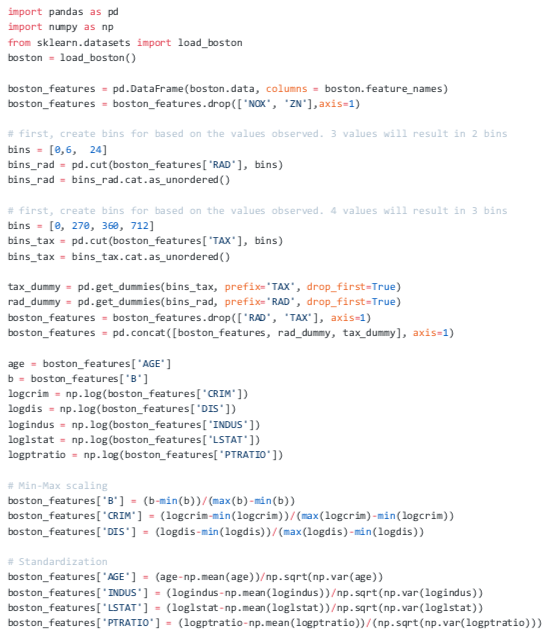

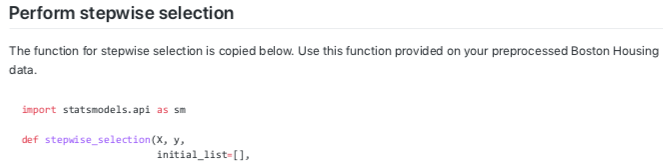

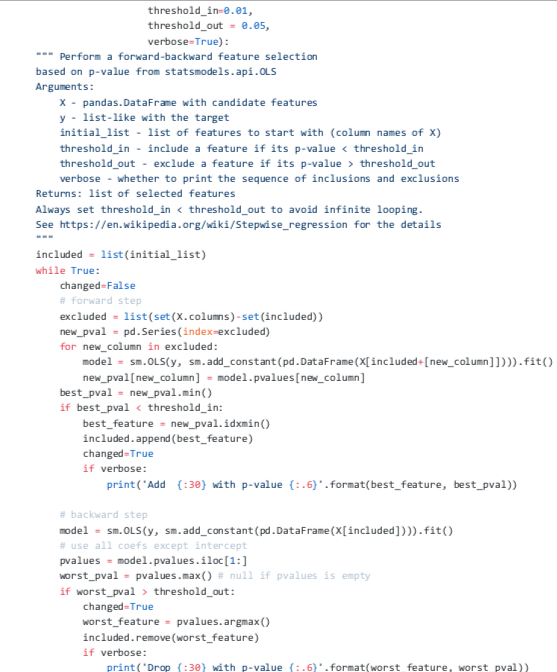

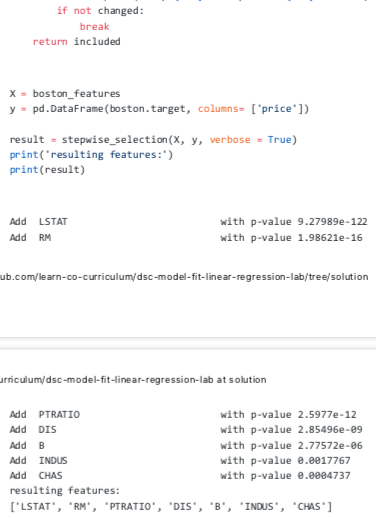

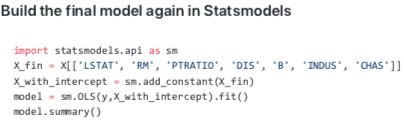

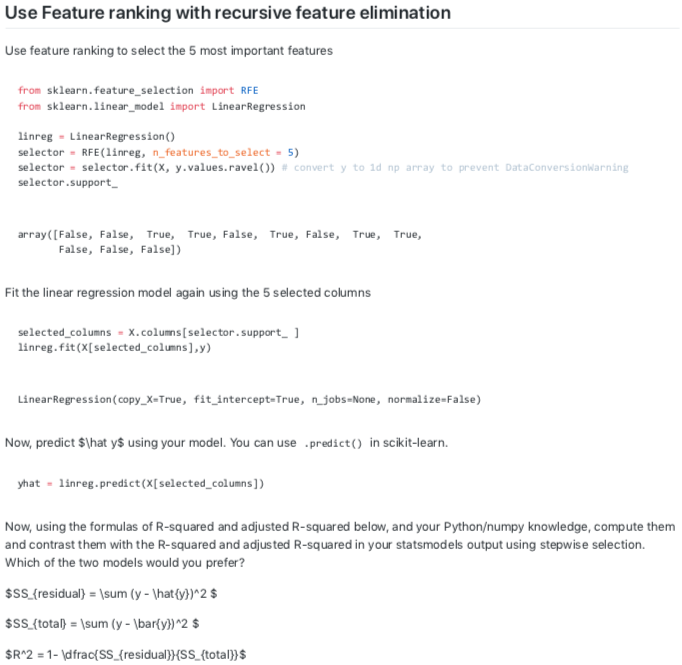

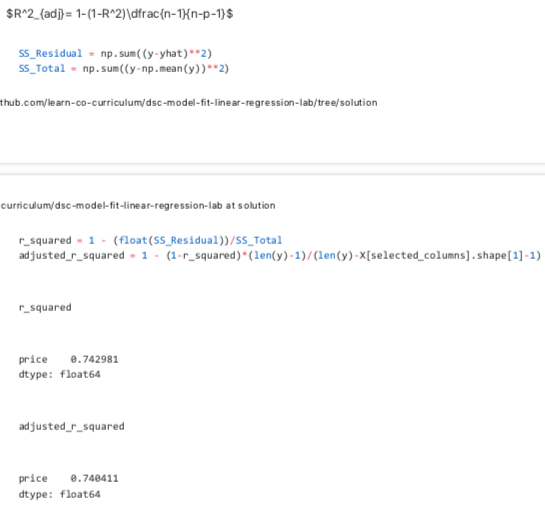

### Coefficient of Determination

We use the R-squared formula to calculate the coefficient of determination. Once a regression model is created, we eed to decide how "accurate" the regression line is to somedegree. R-squared is used to learn how much of the error is a result in variation in the data features, as opposed to being a result of the regression line being a poor fit.

The first step in calculating r-squared is to calculate the squared error. The squared error is the residual sum of squares of the difference between a given line and the actual data points.

Create a function that takes in y points for two arrays, calculates the difference between corresponding elements of these arrays, squares the differences, and sums all of the squared differences. The function should return the RSS value you saw earlier.

In [ ]:
import numpy as np

def sq_err(y_real, y_predicted):
    squared_error = np.sum((y_real - y_predicted)**2)
    return squared_error

y = np.array([1, 3, 5, 7])
y_pred = np.array([4.1466666, 2.386, 3.56, 5.906])

sq_err(y, y_pred)

Squared error is only a part of the coefficient of determination. Let's now build a function that uses the sq_err() function to calculate the value of R-Squared by first calculating SSE, then use this same function to calculate SST (using the mean of y instead of the regression line), and then plug these values into the R-suqared formula.

In [ ]:
def r_squared(y_real, y_predicted):
    #calculate the numerator.
    num = sq_err(y_real, y_predicted)
    #calculate the denominator.
    denom= np.sum((y_real - y_real.mean())**2)
    return 1 - num/denom

#check the output with some example data
y=np.array([1,3,5,7])
y_pred=np.array([4.16, 2.38, 3.56, 5.90])

r_squared(y, y_pred)

#Using SSexp/SStot

def r_squared(y_real, y_predicted):
    ssexp=np.sum((y_predicted - y_real.sum())**2)
    denom= np.sum((y_real, y_real.mean())**2)
    return ssexmp/denom

#This gives us an R-squared value very low, 
#but it also wasn't real data.

### Cross Validation
Here we will perform cross validation on a model to determine optimal model performance. Then, we will compare training and testing errors to determine if themodel is over or underfitting.

In [ ]:
import pandas as pd, numpy as np, matplotlib.pylot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_feautres['B']
logdis = np.log(boston_features['DIS'])
loglstat = np.log(boston_features['LSTAT'])

#minmax scaling
boston_features['B']= (b-min(b))/max(b)-min(b)
boston_feautres['DIS']  (logdis-min(logdis))/max(logdis)-mind(logdis)

#standardization
boston_features['LSTAT']

x = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target, columns = ['target'])
type(x)

#Train-test split

from sklearn.model_seection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

print(len(x_train), len(x_test), len(y_train), len(y_test))

#fit the model

from sklearn.linear_model import LinearRegression
linreg= LinearRegression()

linreg.fit(x_train, y_train)
y_hat_test = linreg.predict(x_test)

#Residuals and MSE

from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

#Cross Validation
#Write a kfolds() that splits a dataset into k evenly sized pieces.
#if the full dataset is not divisible by k, make the first few folds
#one larger than later ones. We want the folds to be a list of subsets of data!

def kfolds(data, k):
    #make the data a pandas dataframe
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds=[]
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers
        #fold size will be 1 larger to account for leftovers
        fold = data.iloc[start_obs : start_obs+fold_size+1]
        folds.append(fold)
        start_obs += fold_ize + 1
        else:
            fold = data.iloc[start_obs : start_obs+fold_size]
            folds.append(fold)
            start_obs += fold_size
        return folds

#Apply it to the boston housing data

bos_data = pd.concat([x.rest_index(drop=true),y], axis=1)
bos_folds = kfolds(bos_data,5)

#Perform a linear regression for each fold and calculate the training and test error

test_errs = []
train_errs = []

k=5

for n in range(k):
    train = pd.concat([fold for i, fold in enumerate(bos_folds) if i!=n])
    test = bos_folds[n]
    
    linreg.fit(train[x.columns], train[y.columns])
    #evaluate train and test errors
    y_hat_train = linreg.predict(train[x.columns]
    y_hat_test = linreg.redict(test[x.columns])
    train_residuals = y_hat_train - train[y.columns]
    test_residuals = y_hat_test - test[y.columns]
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2)) 
    print(train_errs)
    print(test_errs)                             


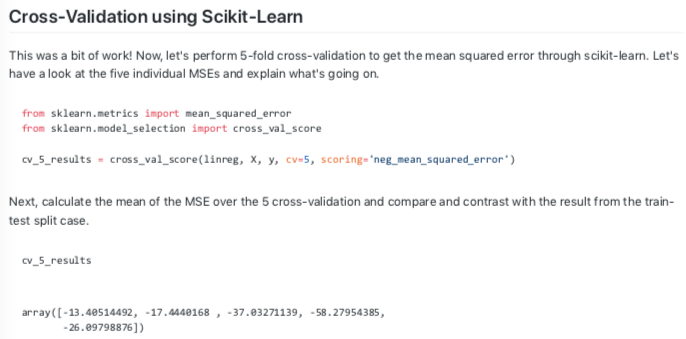

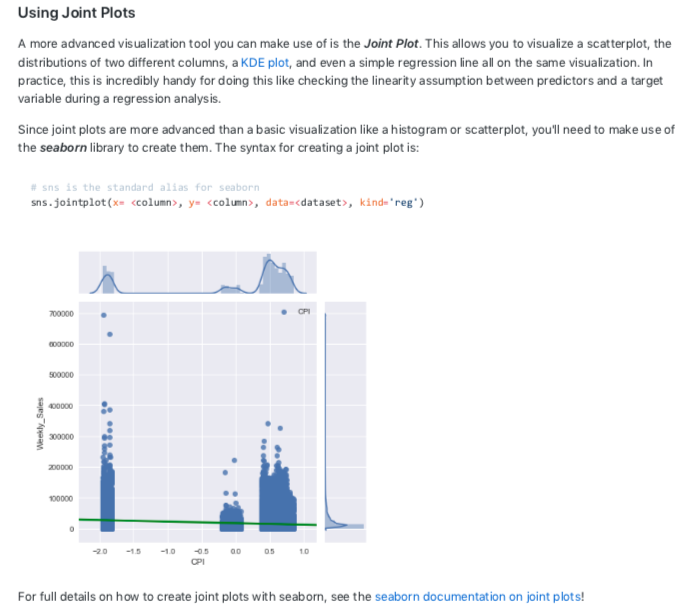

### Exploring your data

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

df.hist(figsize=(20,18));

#Note how skewed most of the distributions are. While linear 
#regression does not assume each individual predictor
#is normally distributed, it does assume a linear 
#relationship between the predictors and the target
#variable. To hold this assumption holds true, you
#can plot some single variable regression plots of each feature
#against the target variable using seaborn.

#Check for Linearity- one assumption in linear regression
#is that the target variable is linearly relatd to the 
#input feature.

#We can use the sns.jointplot() function to investigate
#whether this relation holds true for the various predictors

sns.jointplot('piece_count', 'list_price', data=df, kind='reg');
sns.joinplot('num_reviews', 'list_price', data=df, kind='reg');

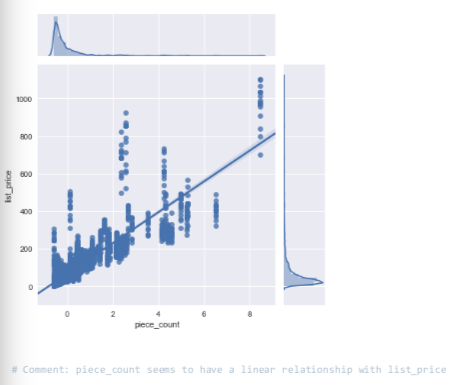
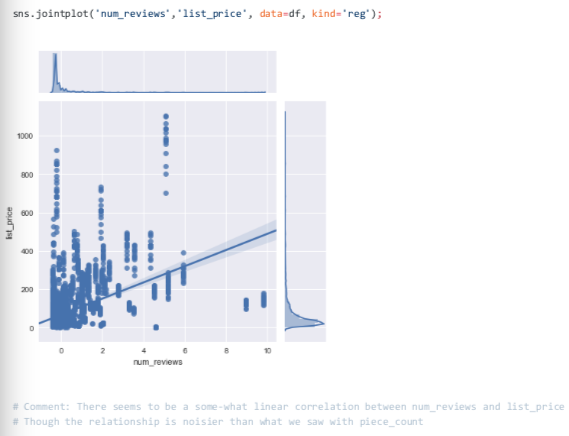
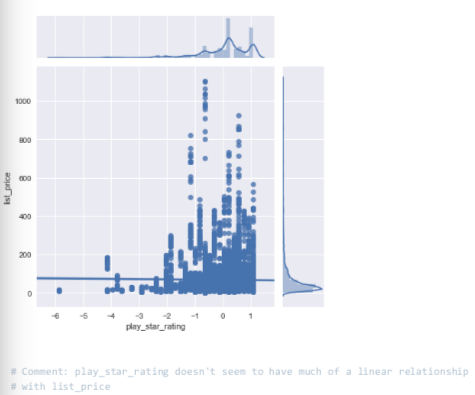
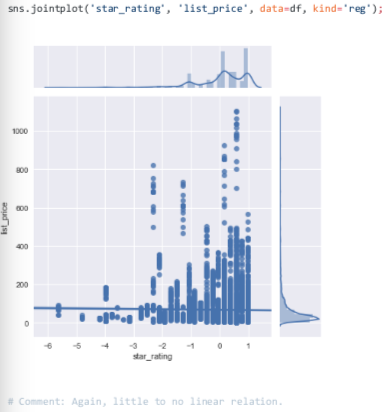
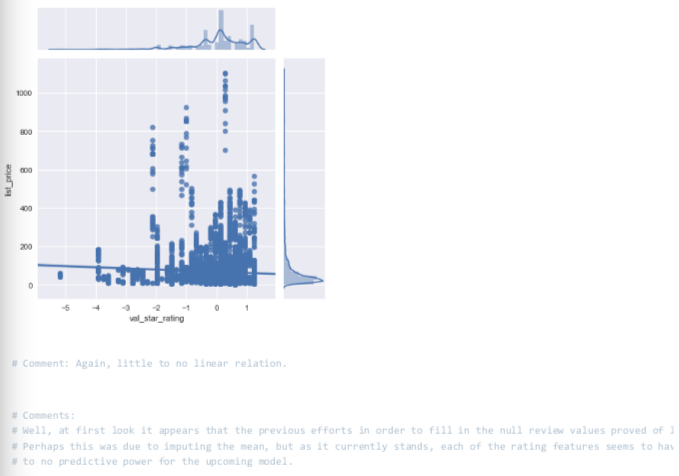

### Checking for Multicollinearity

It's important to make note of predictive features that may result in multicollinearity. While definitive checks for multicollinearity require analyzing the resulting model, predictors with overly high pairwise correlation (r > .65) are almost certain to produce multicollinearity. Generate the pairwise/pearson correlation coefficients of your predictive features and visualize as a heatmap.

In [ ]:
feats =['piece_count', 'num_reviews', 'play_star_rating','star_rating', 'val_star_rating']
corr = df[feats].corr()
corr
sns.heatmap(corr, center=0, annot=True);

In [1]:
#Make the categorical variables the dummies.

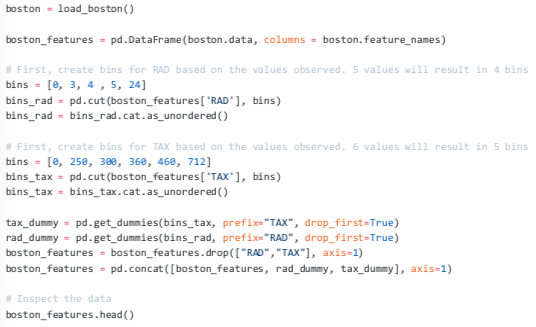

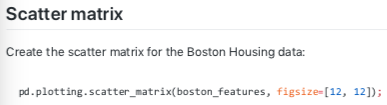

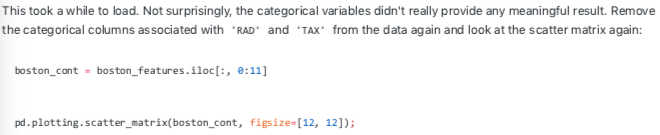

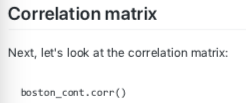

### Checking for Interactions

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

regression = LinearRegression()
boston = load_boston()

#Create a baseline model which includes all of the variables
#in the Boston housing data set to predict the house prices.
#Then use 10-fold cross-validation and report the mean R-Squared value
#as the baseline for R-Squared.

y = pd.DataFrame(boston.target, columns = ['target'])
df = pd.DataFrame(boston.data, columns = boston.feature_names)
all_data = pd.concat([y,df], axis = 1)

crossvalidation = KFold(n_splits = 10, shuffle=True, random_state=1)
baseline = np.mean(cross_val-score(regression, df, y, scoring="r2", cv=crossvalidation))

baseline

#See how interactions improve your baseline
#Next, create all possible combinations of interactions
#Loop over them and then add them to the baseline model, one by one, to see
#how they affect the R-Squared. You will create a for loop through all
#combinations of 2 predictors. You can use combinations from itertools
#to create a list of all the pairwise combinations.

from itertools import combinations
combinations = list(combinations(boston.feature_names, 2))

interactions = []
data = df.copy()
for comb in combinations:
    data['interaction'] = data[comb[0]] * data[comb[1]]
    score = np.mean(cross_val_score(regression, data, y, scoring="r2", cv=crossvalidation))
    if score > baseline: interactions.append((comb[0], comb[1]), round(score,3)))
        
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:5])

#Look at the top 3 interactions: "RM" as a confounding factor
#The top 3 interactions seem to involve "RM", the number of 
#rooms as a confounding variable for all of them.
#We will: 1. Split the data into 3 groups. One for houses
#with a few rooms, one for houses with a medium number of rooms, etc
#2. Create a function called build_interaction_rm(). This functions
#takes an argument varname (which can be set equal to the column name as a string)
#and a column description (which describes the variable or varname, to be included
#on the x-axis of the plot. The function outputs a plot that uses "RM" as a confounding factor
#Each plot should have three regression lines, one for each level of "RM")

high_rm = all_data[rm > np.percentile(rm, 67)]
med_rm = all_data[(rm > np.percentile(rm, 33)) & (rm <= np.percentile(rm, 67))]
low_rm = all_data[(rm <= np.percentil(rm, 33))]

def build_interaction_rm(varname, description):
    regression_h = LinearRegression()
    regression_m = LinearRegression()
    regrssion_l = LinearRegression()
    regression_h.fit(high_rm[varname].values.reshape(-1,1), high_rm['target'])
    regression_m.fit(med_rm[varname].values.reshape(-1,1), med_rm['target'])
    regression_l.fit(low_rm[varname].values.reshape(-1,1), low_rm['target'])
    
#Make Predictions

pred_high = regression_h.predict(high_rm[varname].values.reshape(-1,1))
#etc.
#the coefficients
print(regression_h.coef_)
#plot outputs
plt.figure(figsize=(12,7))
plt.scatter(high_rm[varname], high_rm['target', color='blue', alpha =0.3, label='more rooms'])
#etc.

plt.plot(high_rm[varname], pred_high, color='blue', linewidth=2)

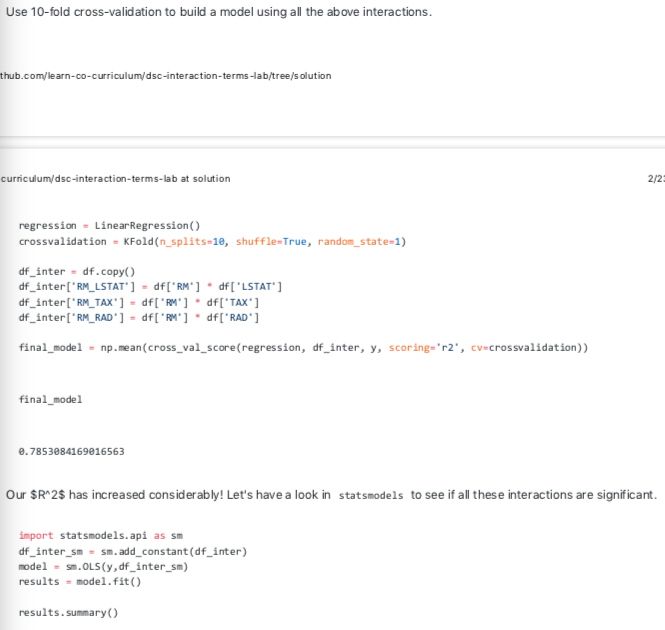

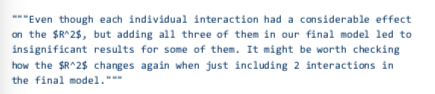

### Preprocessing

In [ ]:
df.columns = [col.replace('', '_') for col in df.columns]

### OLS
Based on the p-values in an OLS, we can sometimes see that there are a number of extraneous features. Recall that a common significance cutoff is 0.05. The refined model should eliminate these irrelevant features.

In [ ]:
#Initial refinement

outcome = 'mpg_highway'
x_cols = ['passengers', 'wheelbase', 'weight', 'fueltank']
predictors = '+'.join(predictors)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()


### QQ Plot

Again, recall that we should check to ensure that our residuals are normally distributed. As you've sen before, a QQ plot is a helpful visual for analyzing this.

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


### Checking for Homoscedasticity

You should also check that your errors do not display heteroscedasticity; if the errors appear to increase or decrease based on the target variable, then the model does not meet the initial assumptions.

In [ ]:
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])

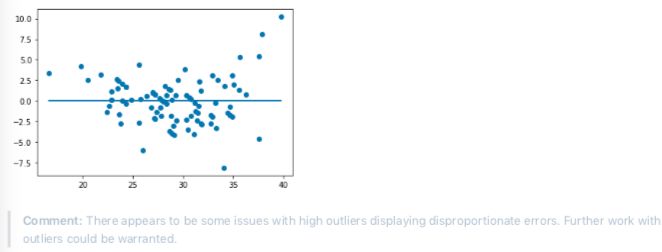

Due to the particularly large errors visible above 37mpg, it's reasonable to remove these outliers and retrain the model on the remaining subset. While the model will be specific to this subset, it could prove to be more accurate and reflective of the general domain.

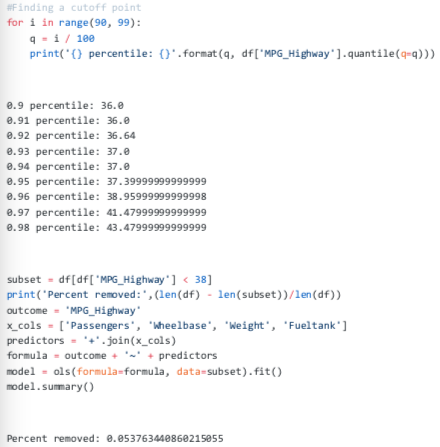

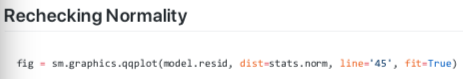

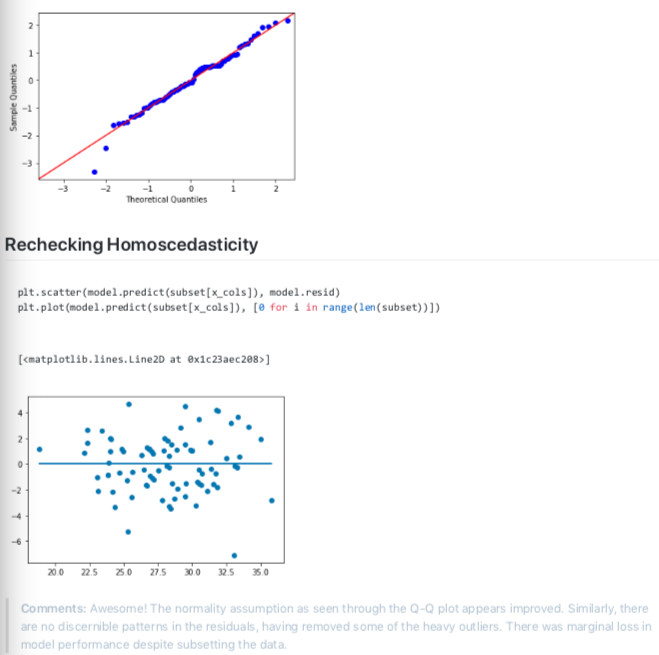

### Multiple Linear Regression

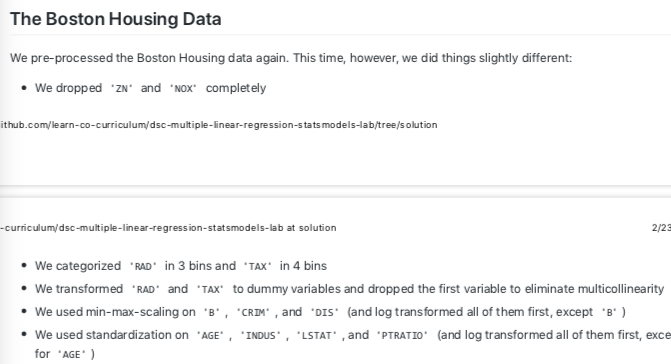

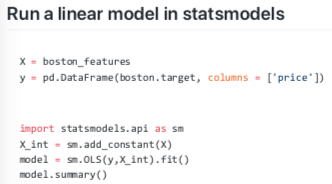

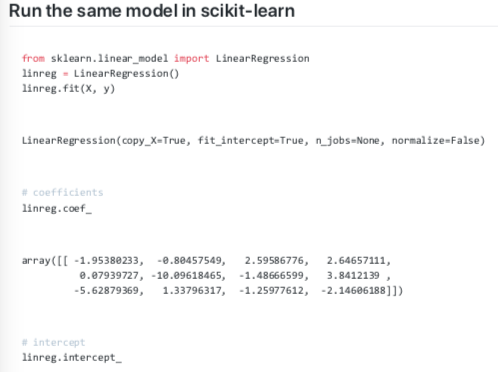

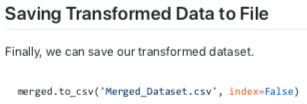

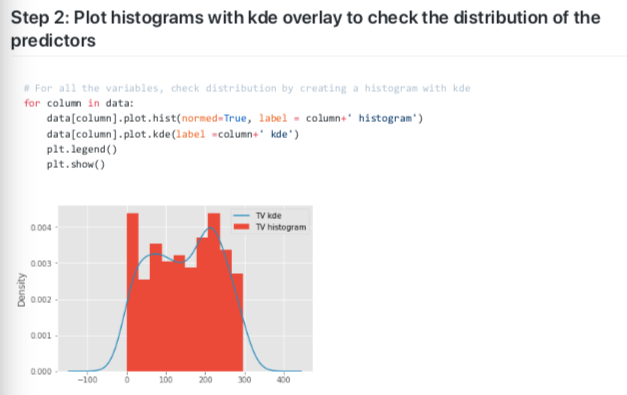

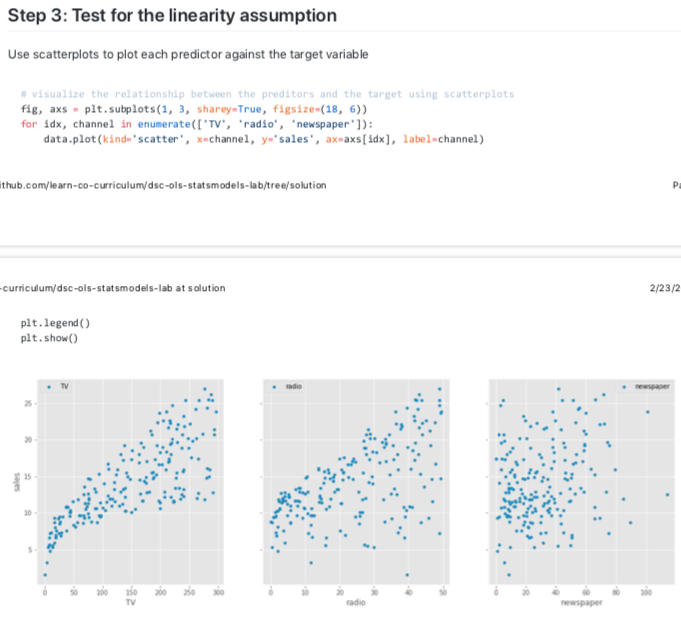

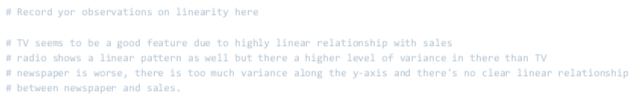

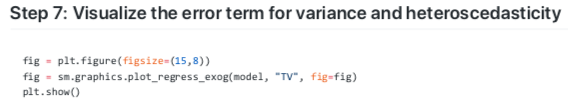

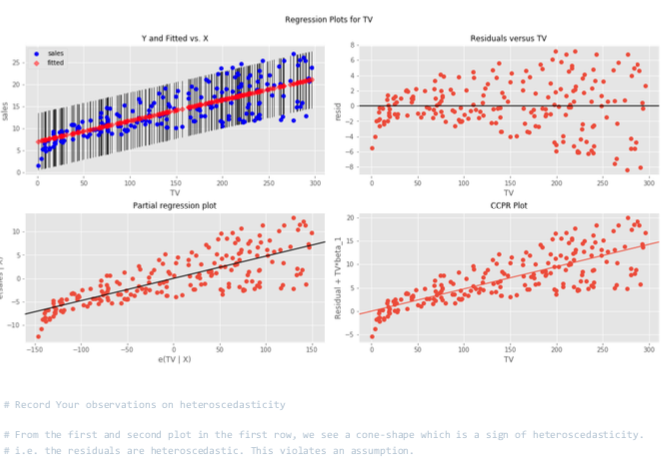

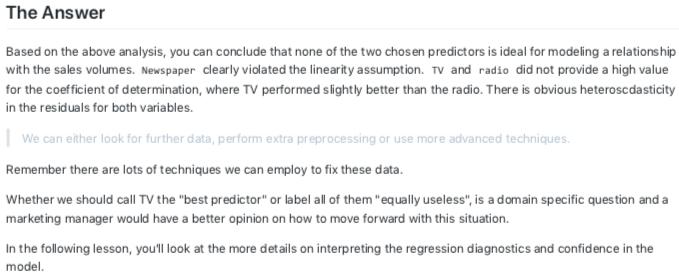

### Polynomial Regression/Features

In [ ]:
#Train-Test split
#The next step is to split the data into training and 
#Tests sets. Set te random_state to 42, and assign 75% of the
#data in the training set.
from sklearn.model_selection import train_test_set
y=df['y']
x = df.drop(columns'y',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.75)


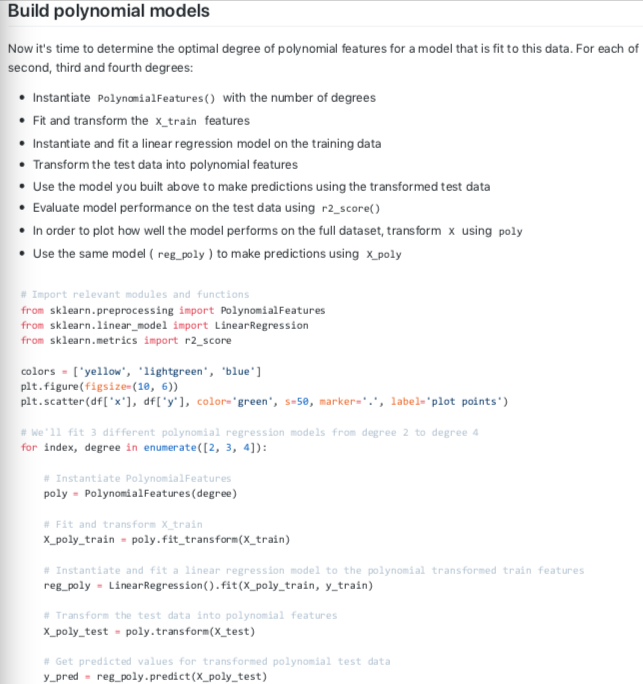

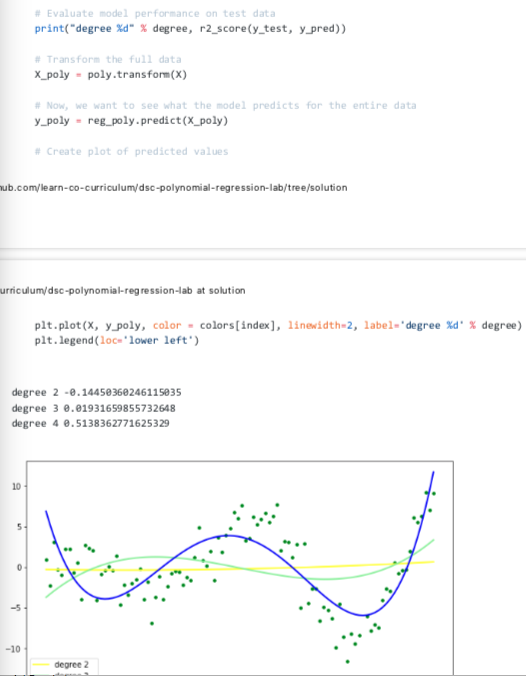

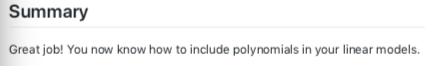

### Regression Model Validation

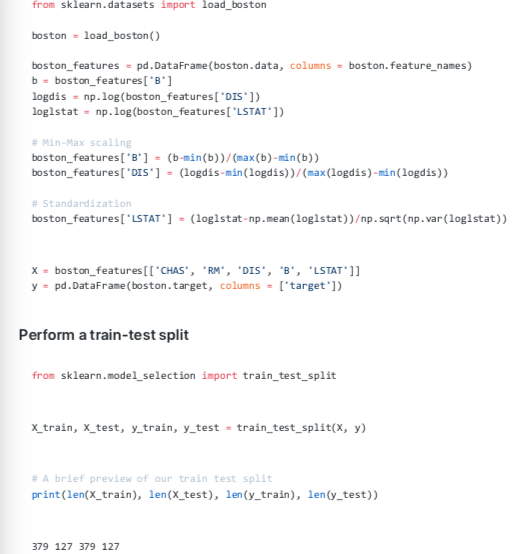

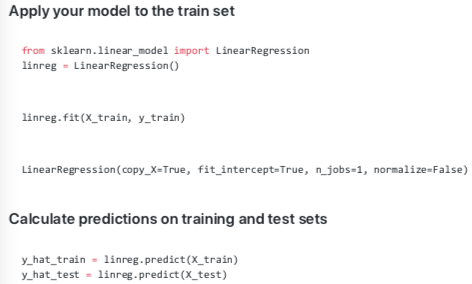

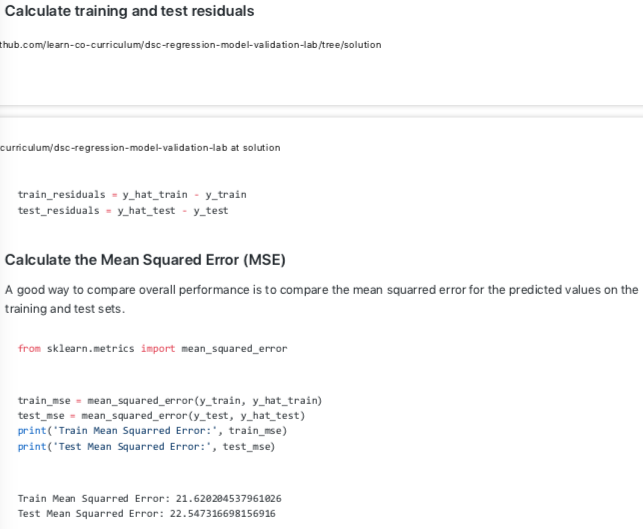

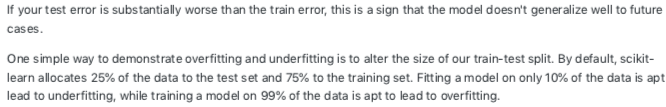

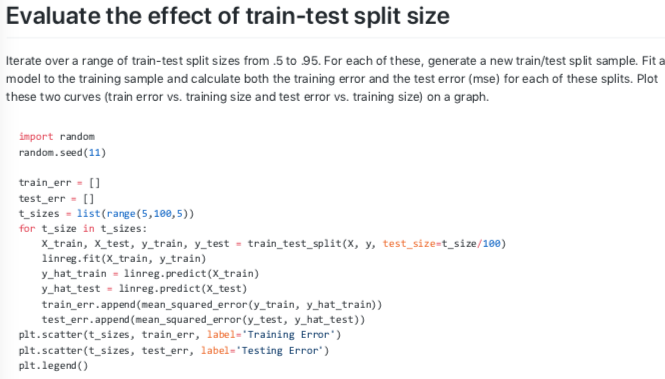

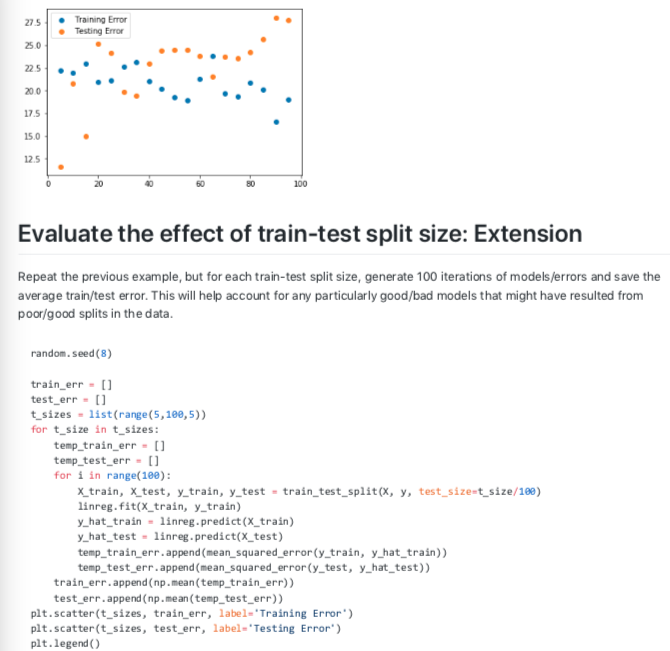

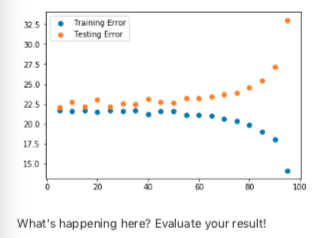

In [ ]:
#histograms, then

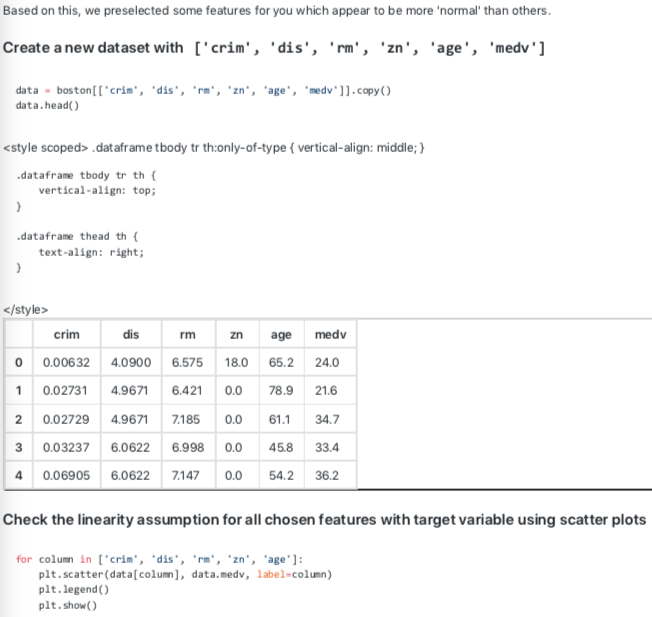

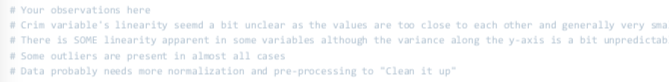

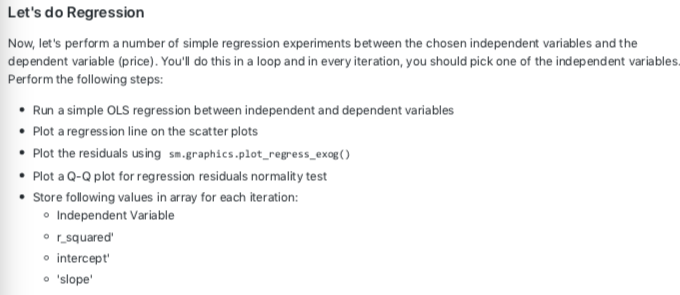

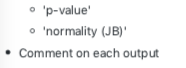

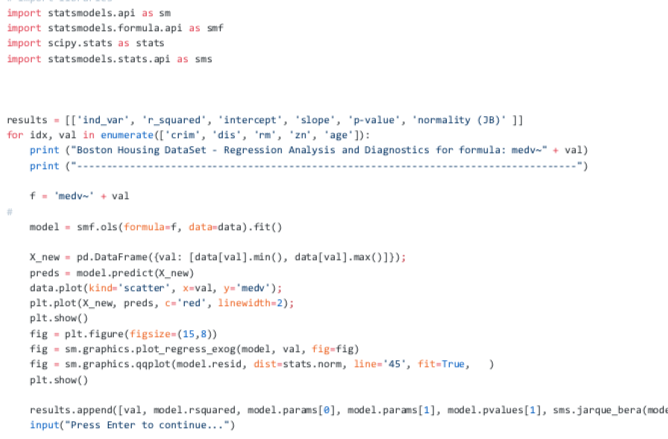

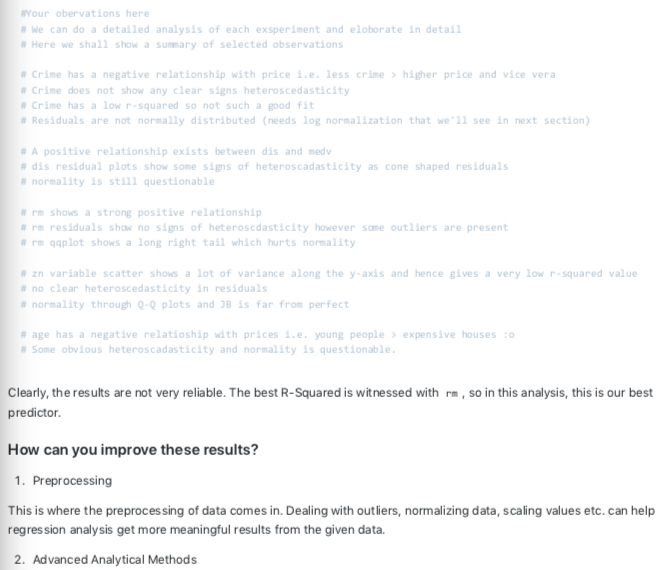

### Regression Continued

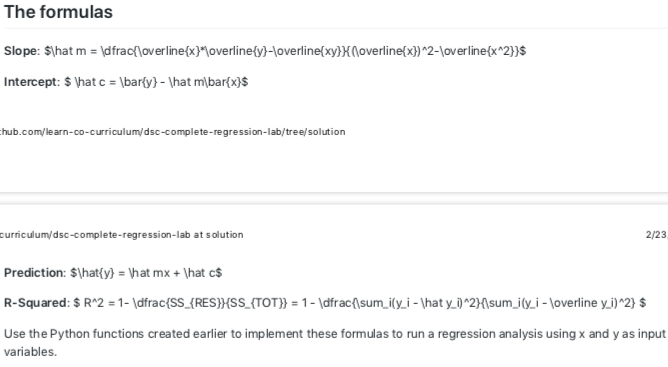

### Scrubbing and Cleaning

When building a model for predictive purposes, more data is always better when training the final model. However, when working with large datasets, it is common to workwith only a subsample of the dataset. Building a model is an iterative process. Often, you fit the model, investigate the results, then train the model again with some small tweaks based on what you noticed. Since this is an iterative process, you want to avoid long runtimes, and iterate as quickly as possible. When you're satified with model you've built on the subsample of data, then you would fit the model on the entire dataset.

One of the most common problems is columns that are encoded as the wrong data type. Ex. Numeric data that is encoded as a string. Or categorical data encoded as integer values. Use .info() to understand the data.

In [ ]:
df['numeric_string_col'] = df['numeric_string_col'].astype('float')
#but if there is a single comma or a $, the above statement will fail.
#When Numpy sees multiple data types in an array, it defaults to casting
#everything as a string. If you try to cast a column from string
#to numeric data types and get an error, consider the unique values
#in that column.

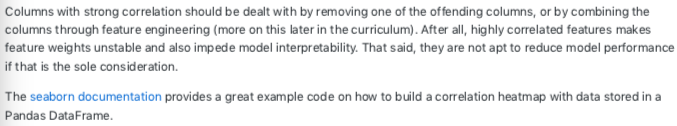